Rechneranwendungen in der Physik - Übung N.4 Umlaufbahnen

Santiago.R

In [1]:
import numpy as np
import sympy as sy
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate

# Simulation der Erd- und Sonnenumlaufbahnen $U_E(t)$ sowie $U_S(t)$

Zuerst werden die wichtigen Konstanten und Startparameter definiert;

In [2]:
#Konstanten
G = 6.67430e-11 #in m3/kg*s2
m_sonne = 1.989e30 #in kg
m_erde = 5.972e24 #in kg (wird in dieser Lösung vernachlässigt, da die Sonne als stationär im Punkt (x,y)=(0,0) angenohmen wird)
r_ES = 1.496e11 #in m
v_E = 29.78e3 #in m/s
#Startparameter der Erde
y0_erde = r_ES
x0_erde = 0
v_x0_erde=-v_E #negativ um in Richtung gegen den Uhrzeigersinn zu zeigen
v_y0_erde=0
#Startparameter der Sonne
y0_sonne = r_ES*m_erde/(m_erde+m_sonne)
x0_sonne = 0
v_x0_sonne=-np.sqrt(G*(m_erde+m_sonne)*2/y0_sonne) #negativ um in Richtung gegen den Uhrzeigersinn zu zeigen
v_y0_sonne=0

Um einen Plot $U_E(t)$ für die Umlaufbahn der Erde um die Sonne zu erstellen müssen zuerst die Bewegungsgleichungen formuliert werden. Diese hängen im wesetlichen von der einzigen in diesem System relevanten Kraft, die Gravitationskraft $\vec{F_g}=-G \cdot \frac{M \cdot m}{\vec{r}^2}$ ab. Diese kann dann mit $\vec{r}=\frac{\vec{r_e}}{|r|}$ und $|r|=\sqrt{x^2+y^2}$ umgeschrieben werden als $\vec{F_g}=-G \cdot \frac{M \cdot m}{\sqrt{x^2+y^2}^{3/2}} \cdot \vec{r_e}$. Die $x$- und $y$-Komponenten der angreifenden Gravitationskraft können dann mit $F_x=-G \cdot \frac{M \cdot m}{\sqrt{x^2+y^2}^{3}} \cdot x$ und $F_y=-G \cdot \frac{M \cdot m}{\sqrt{x^2+y^2}^{3}} \cdot y$ parametrisiert und anschließend auf die gekoppelten Differentialgleichungen $\frac{d^2x}{dt^2}=-\frac{GM}{\sqrt{x^2+y^2}^{3}} \cdot x$ und $\frac{d^2y}{dt^2}=- \frac{GM}{\sqrt{x^2+y^2}^{3}} \cdot y$ überführt werden. Nummerisches Integrieren dieser Differentialgleichungen nach der Zeit $t$ liefert dann die $x$- und $y$-Werte der Umlaufbahn $U_E(t)$ an jedem integrierten Zeitpunkt $t$     

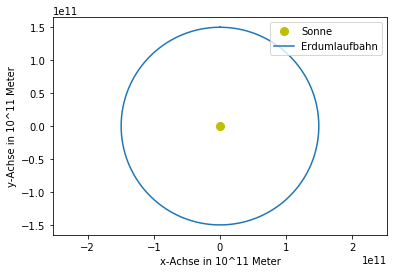

In [3]:
def dgl_erde_sonne(i, t):
    x, y, v_x, v_y = i #Input für die Startparameter 
    g = G*m_sonne/np.sqrt(x**2+y**2)**3; #der angreifende Parameter an jedem Punkt x,y
    return [v_x, v_y, -x*g, -y*g];

t = np.linspace(0, 31536000, 50000) #in SI-Einheiten ist die Angabe für ein Jahr auf Sekunden umgestellt 
startparameter = [x0_erde, y0_erde, v_x0_erde, v_y0_erde]
s_t = integrate.odeint(dgl_erde_sonne, startparameter, t)

x,y,_,_ = s_t.T

plt.plot(0,0,'oy', ms=8, label = 'Sonne')
plt.plot(x,y, label = 'Erdumlaufbahn'); plt.axis('equal');
plt.xlabel("x-Achse in 10^11 Meter")
plt.ylabel("y-Achse in 10^11 Meter")
plt.legend(loc='upper right')
plt.show()

# Simulation für unterschiedliche Toleranzen [e-1,e-5]

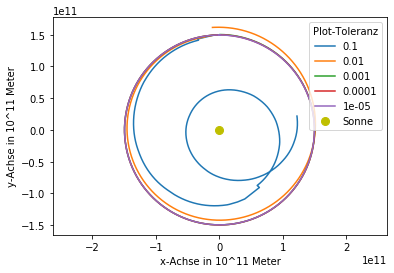

In [5]:
t = np.linspace(0, 31536000, 50000) #in SI-Einheiten ist die Angabe für ein Jahr auf Sekunden umgestellt
startparameter = [x0_erde, y0_erde, v_x0_erde, v_y0_erde]
for i in range(1,6,1):
    s_t = integrate.odeint(dgl_erde_sonne, startparameter, t, rtol=10**(-i))
    x,y,_,_ = s_t.T
    plt.plot(x,y, label = 10**(-i)); plt.axis('equal');
plt.plot(0,0,'oy', ms=8, label = 'Sonne')
plt.xlabel("x-Achse in 10^11 Meter")
plt.ylabel("y-Achse in 10^11 Meter")
plt.legend(title='Plot-Toleranz',loc='upper right')
plt.show()

# Simulation für unterschiedliche Startwerte $r_0$

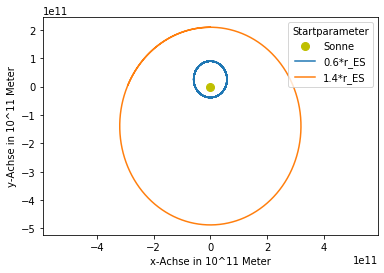

In [6]:
#Neue Startwerte
y1_erde=0.6*r_ES
y2_erde=1.4*r_ES
#Integration für y1
t = np.linspace(0, 4*31536000, 50000) #in SI-Einheiten ist die Angabe für ein Jahr auf Sekunden umgestellt 
startparameter1 = [x0_erde, y1_erde, v_x0_erde, v_y0_erde]
s_t1 = integrate.odeint(dgl_erde_sonne, startparameter1, t)
#Integration für y2
startparameter2 = [x0_erde, y2_erde, v_x0_erde, v_y0_erde]
s_t2 = integrate.odeint(dgl_erde_sonne, startparameter2, t)
#Plots
x1,y1,_,_ = s_t1.T
x2,y2,_,_ = s_t2.T
plt.plot(0,0,'oy', ms=8, label = 'Sonne')
plt.plot(x1,y1, label = '0.6*r_ES'); plt.axis('equal');
plt.plot(x2,y2, label = '1.4*r_ES'); plt.axis('equal');
plt.xlabel("x-Achse in 10^11 Meter")
plt.ylabel("y-Achse in 10^11 Meter")
plt.legend(title='Startparameter',loc='upper right')
plt.show()